In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [8]:
df1=pd.read_csv(r'C:\Users\syast\OneDrive\Documents\Data Analysis Practice\Movies Project\data_v2.csv')

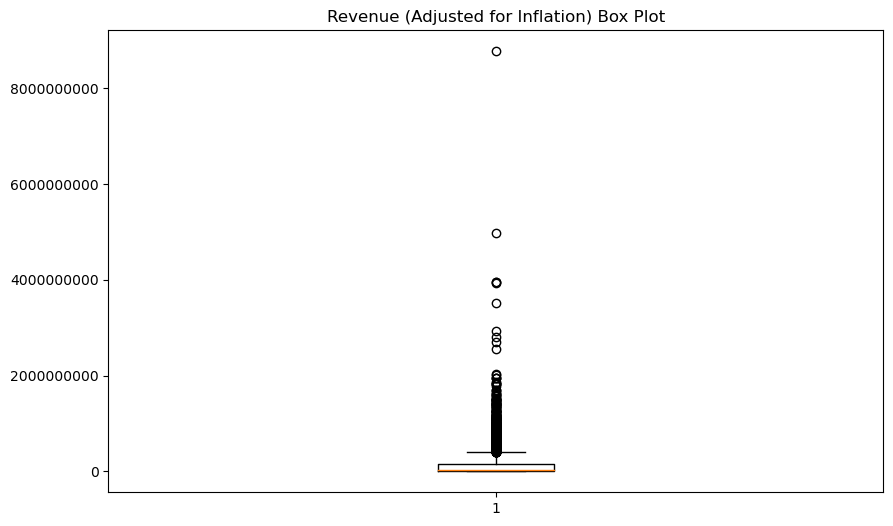

In [9]:
# find revenue outliers
plt.boxplot(df1['revenue_inflation_adjusted'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Revenue (Adjusted for Inflation) Box Plot')
plt.show()

In [10]:
# correlation between numeric values
cr=df1[['budget','revenue','vote_average','popularity','runtime','revenue_inflation_adjusted']].corr(method='pearson')

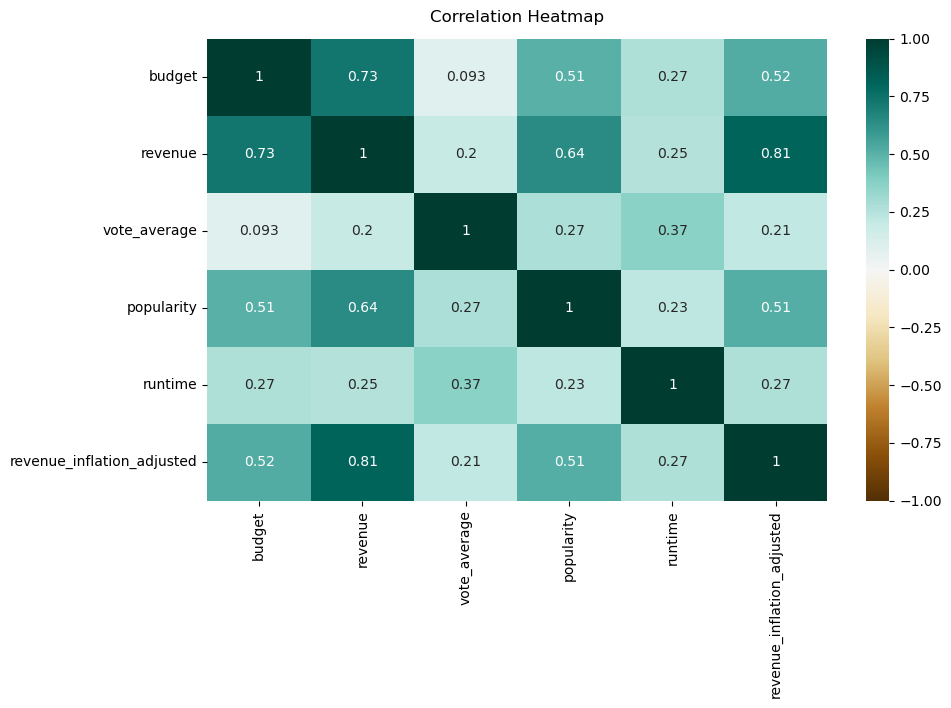

In [11]:
heatmap = sns.heatmap(cr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [12]:
# examining the Pearson coefficient and p-value
stats.pearsonr(df1['budget'],df1['revenue'])

PearsonRResult(statistic=0.7308059539883839, pvalue=0.0)

In [19]:
stats.pearsonr(df1['popularity'],df1['revenue_inflation_adjusted'])

PearsonRResult(statistic=0.5130405385035455, pvalue=9.437e-321)

Text(0.5, 1.0, 'Reg Plot of Budget and Revenue')

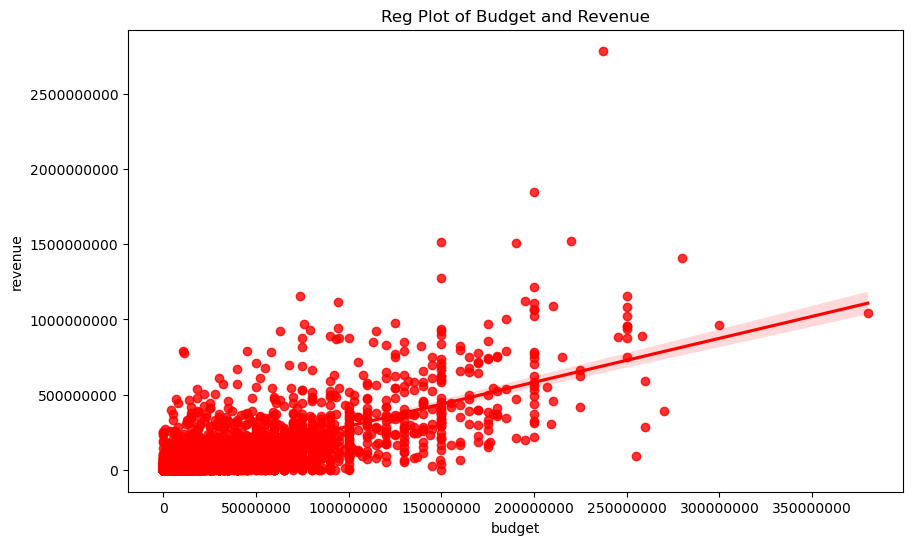

In [22]:
sns.regplot(df1,x='budget',y='revenue',color='red')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.title('Reg Plot of Budget and Revenue')

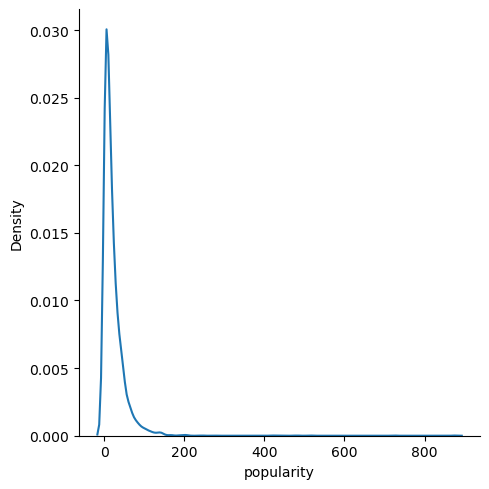

In [23]:
# investigate the popularity column
sns.displot(df1,x='popularity',kind='kde')

In [31]:
# creating a stripplot to show the revenue (adjusted for inflation) for movies in each popularity tier
df1['popularity'].describe()

count    4802.000000
mean       21.496776
std        31.818451
min         0.000372
25%         4.671734
50%        12.924931
75%        28.332017
max       875.581305
Name: popularity, dtype: float64

In [32]:
conditions=[(df1['popularity']<=4.671734),
           (df1['popularity']>4.671734) & (df1['popularity']<=12.924931),
           (df1['popularity']>12.924931) & (df1['popularity']<=28.332017),
            (df1['popularity']>28.332017)]

In [33]:
values=['low popularity','below average popularity','above average popularity','high popularity']

In [34]:
df1['pop_tier']=np.select(conditions,values)

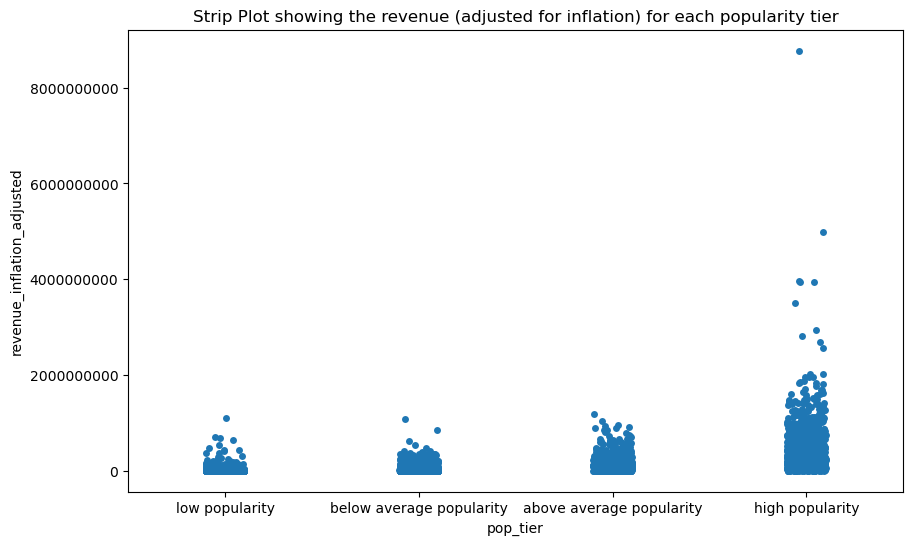

In [35]:
sns.stripplot(data=df1,x='pop_tier',y='revenue_inflation_adjusted', order=values)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Strip Plot showing the revenue (adjusted for inflation) for each popularity tier')
plt.show()